# Deep Learning Just Works &trade;

So, let's train a significantly better model for image recongition.  We will use a Convolutional Neural Network (CNN) instead of a plain MLP.


First, load the data in a more appropriate format (do not flatten into vectors):

In [1]:
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, MaxPooling2D, Conv2D, Flatten, Input
from tensorflow.keras.optimizers import Adam
%matplotlib inline

# Prepare the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)


### Going Deeper with Convolutions

Define and train a simple CNN:

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

In [3]:
# Build the model
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
# Compile the model
model.compile(loss=categorical_crossentropy, optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


In [4]:
# Train the model
results = model.fit(
    x_train, y_train,
    batch_size=256,
    epochs=20,
    verbose=1,
    validation_data=(x_test, y_test)
)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 70ms/step - accuracy: 0.8584 - loss: 0.4708 - val_accuracy: 0.9823 - val_loss: 0.0521
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - accuracy: 0.9851 - loss: 0.0494 - val_accuracy: 0.9860 - val_loss: 0.0457
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - accuracy: 0.9905 - loss: 0.0302 - val_accuracy: 0.9897 - val_loss: 0.0312
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - accuracy: 0.9932 - loss: 0.0221 - val_accuracy: 0.9930 - val_loss: 0.0230
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.9950 - loss: 0.0154 - val_accuracy: 0.9931 - val_loss: 0.0225
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.9963 - loss: 0.0127 - val_accuracy: 0.9924 - val_loss: 0.0231
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.9969 - loss: 0.0095 - val_accuracy: 0.9921 - val_loss: 0.0245
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9966 - loss: 0.0094 - val

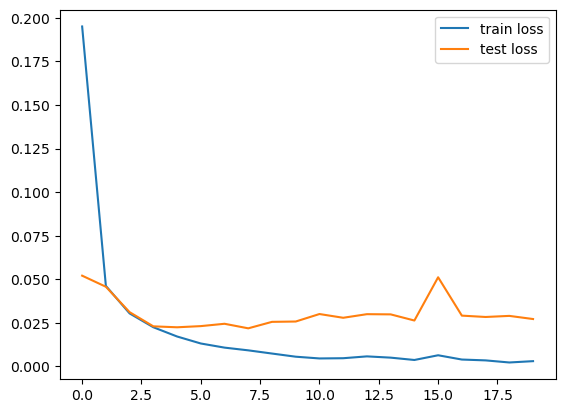

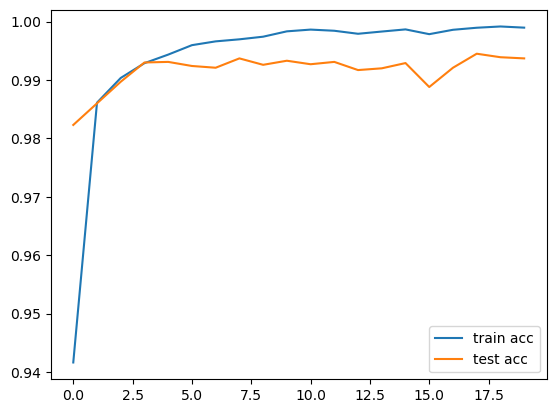

In [5]:
plt.figure(1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['train loss', 'test loss'])

plt.figure(2)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['train acc', 'test acc'])

Quite impressive! 0.62% error, even without any form of explicit regularization!

In [6]:
print("Train error (%): ", 100  - model.evaluate(x_train, y_train, batch_size=128)[1]*100)
print("Test error (%): ", 100- model.evaluate(x_test, y_test, batch_size=128)[1]*100)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9998 - loss: 7.4618e-04
Train error (%):  0.024998188018798828
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9924 - loss: 0.0341
Test error (%):  0.6299972534179688
